Viết chương trình chọn Hồ Xuân Hương trong ảnh 'dalat.jpg' từ thư mục exercise. Xoay đối tượng vừa chọn 1 góc 45 độ và dùng phương pháp Adaptive Thresholding với ngưỡng 60 và lưu vào máy với tên là 'ho_xuan_huong.jpg'

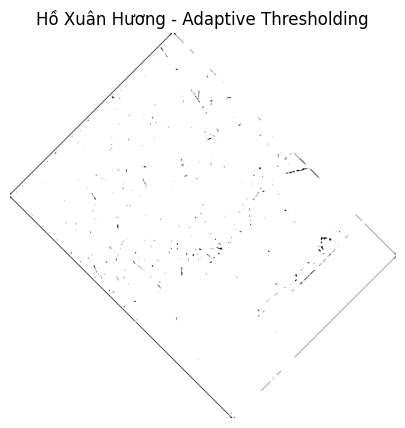

In [1]:
# 1. Import thư viện
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 2. Đọc ảnh chính và ảnh template (vùng Hồ Xuân Hương)
img = cv2.imread("exercise/dalat.jpg")
template = cv2.imread("exercise/xuanhuong_template.jpg")

# Chuyển sang grayscale để so khớp
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
h, w = template_gray.shape

# 3. Template Matching để tìm vị trí tốt nhất
result = cv2.matchTemplate(img_gray, template_gray, cv2.TM_CCOEFF_NORMED)
_, _, _, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# 4. Cắt vùng Hồ Xuân Hương
roi = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

# 5. Xoay ảnh vùng chọn 45 độ quanh tâm
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Ma trận xoay
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # Kích thước mới của ảnh sau khi xoay
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # Điều chỉnh ma trận xoay để không bị crop ảnh
    M[0, 2] += (nW / 2) - center[0]
    M[1, 2] += (nH / 2) - center[1]

    # Xoay ảnh
    return cv2.warpAffine(image, M, (nW, nH))

rotated = rotate_image(roi, 45)

# 6. Chuyển ảnh xoay sang grayscale
rotated_gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)

# 7. Áp dụng Adaptive Thresholding (ngưỡng 60, blockSize 11)
adaptive = cv2.adaptiveThreshold(
    rotated_gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,  # hoặc cv2.ADAPTIVE_THRESH_GAUSSIAN_C
    cv2.THRESH_BINARY,
    blockSize=11,
    C=60
)

# 8. Lưu kết quả
cv2.imwrite("ho_xuan_huong.jpg", adaptive)

# 9. Hiển thị kết quả
plt.figure(figsize=(10, 5))
plt.imshow(adaptive, cmap='gray')
plt.title("Hồ Xuân Hương - Adaptive Thresholding")
plt.axis('off')
plt.show()
